In [181]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import math
import pandas

In [182]:
# x = np.array([[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]], dtype=float)
# y = np.array([[0.0], [0.0], [0.0], [1.0]], dtype=float)

#  input x
# x = np.random.uniform(-.5,.5,size=(100,3))
# y = np.random.uniform(-.5,.5,size=(100,1))
# for i in range(0,50):
#     x[i,2] = 1
#     y[i,0] = 0

# # x1, x2 between two circles with radius 3 and 4, x3 = 1
# for i in range(50,100):
#     r = np.random.uniform(3.0, 4)
#     theta = np.random.uniform(0.0,1) * 2 * math.pi
#     x[i,0] = r * np.cos(theta)
#     x[i,1] = r * np.sin(theta)
#     x[i,2] = 1
#     y[i,0] = 1

# Used the following walkthrough from Tensorflow Documentation to learn how to use the dataset for training
# https://www.tensorflow.org/tutorials/keras/regression

column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

dataset = pandas.read_csv("data/auto-mpg.data", names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True).copy().dropna()

dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
dataset = pandas.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')
dataset.tail()


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


In [183]:
training_data = dataset.sample(frac=0.8, random_state=0)
test_data = dataset.drop(training_data.index)

training_features = training_data.copy()
test_features = test_data.copy()

training_labels = training_features.pop('MPG')
test_labels = test_data.pop('MPG')

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(training_features))

print(normalizer.mean.numpy())

[[5.47770691e+00 1.95318497e+02 1.04869446e+02 2.99025195e+03
  1.55592356e+01 7.58980942e+01 1.78343967e-01 1.97452217e-01
  6.24203861e-01]]


2022-02-14 16:53:56.542716: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-14 16:53:56.553448: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [184]:

horsepower = np.array(training_features['Horsepower'])

horsepower_normalizer = keras.layers.Normalization(input_shape=[1,], axis=None)
horsepower_normalizer.adapt(horsepower)


2022-02-14 16:53:56.675778: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-14 16:53:56.687227: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [185]:
# model = tf.keras.Sequential([
#    keras.layers.Dense(units=1, input_shape=[2], activation=tf.nn.relu)])
# model = tf.keras.Sequential([
#   keras.layers.Dense(units=4, input_shape=[None,3], activation=tf.nn.relu),
# keras.layers.Dense(units=5, activation=tf.nn.relu),
# keras.layers.Dense(units=1, activation=tf.nn.sigmoid)])

model = tf.keras.Sequential([
  normalizer,
  keras.layers.Dense(units=1)
])

model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_42 (Normaliza  (None, 9)                19        
 tion)                                                           
                                                                 
 dense_28 (Dense)            (None, 1)                 10        
                                                                 
Total params: 29
Trainable params: 10
Non-trainable params: 19
_________________________________________________________________


In [186]:

# model.predict(training_features[:10])
model.predict(np.asarray(training_features[:10]))

2022-02-14 16:53:56.847058: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


array([[-1.6832452 ],
       [-0.09856419],
       [ 1.914506  ],
       [-2.0366998 ],
       [-1.5918509 ],
       [ 0.05634813],
       [-1.7655438 ],
       [ 1.7616717 ],
       [-0.13857298],
       [-0.65949595]], dtype=float32)

In [187]:
# model.compile(optimizer='adam', loss='mean_squared_error')
# model.compile(optimizer='adam', loss='mean_squared_error')
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')


In [188]:
history = model.fit(
    np.asarray(training_features),
    np.asarray(training_labels),
    epochs=100,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)


Epoch 1/100
8/8 [==============================] - 0s 17ms/step - loss: 22.9419 - val_loss: 22.8667


2022-02-14 16:53:57.084273: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-14 16:53:57.239338: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 2/100
8/8 [==============================] - 0s 7ms/step - loss: 22.0850 - val_loss: 22.1271
Epoch 3/100
8/8 [==============================] - 0s 7ms/step - loss: 21.2724 - val_loss: 21.3820
Epoch 4/100
8/8 [==============================] - 0s 8ms/step - loss: 20.4518 - val_loss: 20.6539
Epoch 5/100
8/8 [==============================] - 0s 7ms/step - loss: 19.6505 - val_loss: 19.9463
Epoch 6/100
8/8 [==============================] - 0s 7ms/step - loss: 18.8096 - val_loss: 19.2075
Epoch 7/100
8/8 [==============================] - 0s 7ms/step - loss: 17.9844 - val_loss: 18.4728
Epoch 8/100
8/8 [==============================] - 0s 7ms/step - loss: 17.1922 - val_loss: 17.7502
Epoch 9/100
8/8 [==============================] - 0s 9ms/step - loss: 16.3798 - val_loss: 17.0191
Epoch 10/100
8/8 [==============================] - 0s 8ms/step - loss: 15.5597 - val_loss: 16.2939
Epoch 11/100
8/8 [==============================] - 0s 9ms/step - loss: 14.7817 - val_loss: 15.5712
Epoch 12

In [189]:
print(model.predict(np.asarray(training_features[:10])))

[[26.077099]
 [24.636162]
 [12.188329]
 [31.114946]
 [32.52069 ]
 [22.354626]
 [33.224373]
 [24.756727]
 [20.492535]
 [26.846601]]


2022-02-14 16:54:02.762991: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


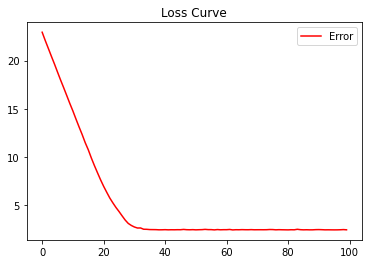

<Figure size 432x288 with 0 Axes>

In [191]:
import matplotlib.pyplot as plt

loss = history.history['loss']


epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Error')

plt.title('Loss Curve')
plt.legend(loc=0)
plt.figure()


plt.show()